Name: Unnati Bhaven Shah

Github username: unnatibshah

USC ID: 4512915005

<center><h1>Shah_Unnati_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

Get the Vertebral Column Data Set

In [2]:
path = '../../data/vertebral_column_data/column_2C.dat'
column_names = ['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Lordosis Angle', 'Sacral Slope', 'Pelvic Radius', 'Grade of Spondylolisthesis', 'Class']
df = pd.read_csv(path, sep=' ', header=None, names=column_names)
df

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [3]:
# Replace values in the "Class" column
class_mapping = {'NO': 0, 'AB': 1}
df['Class'] = df['Class'].map(class_mapping)
df

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

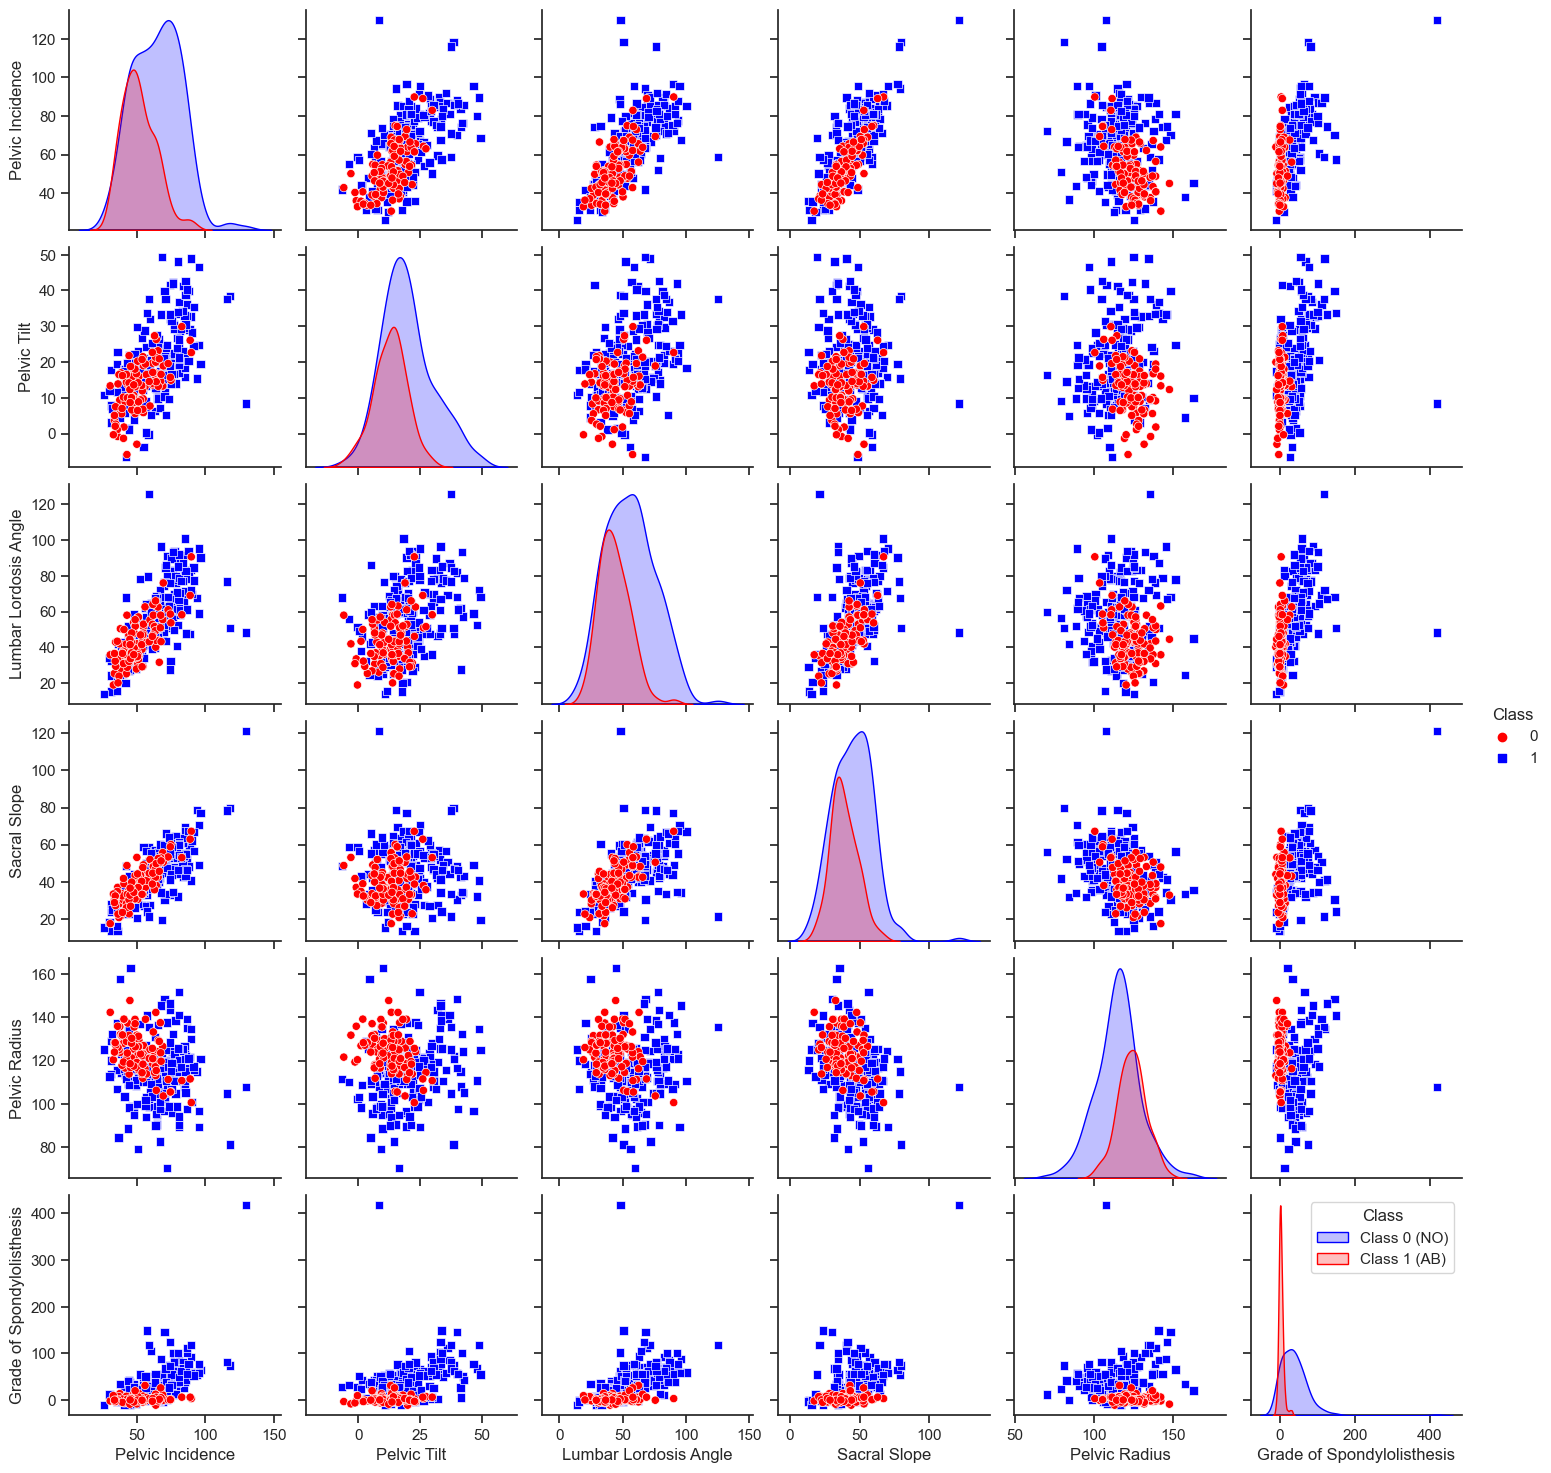

In [4]:
# Map Class labels to colors
class_colors = {0: 'red', 1: 'blue'}

# Pairplot with hue to distinguish Classes 0 and 1
sns.set(style='ticks')
sns.pairplot(df, hue='Class', palette=class_colors, markers=['o', 's'])

# Adjust legend location and title
plt.legend(title='Class', loc='upper right', labels=['Class 0 (NO)', 'Class 1 (AB)'])

# Show the plot
plt.show()

#### ii. Boxplots

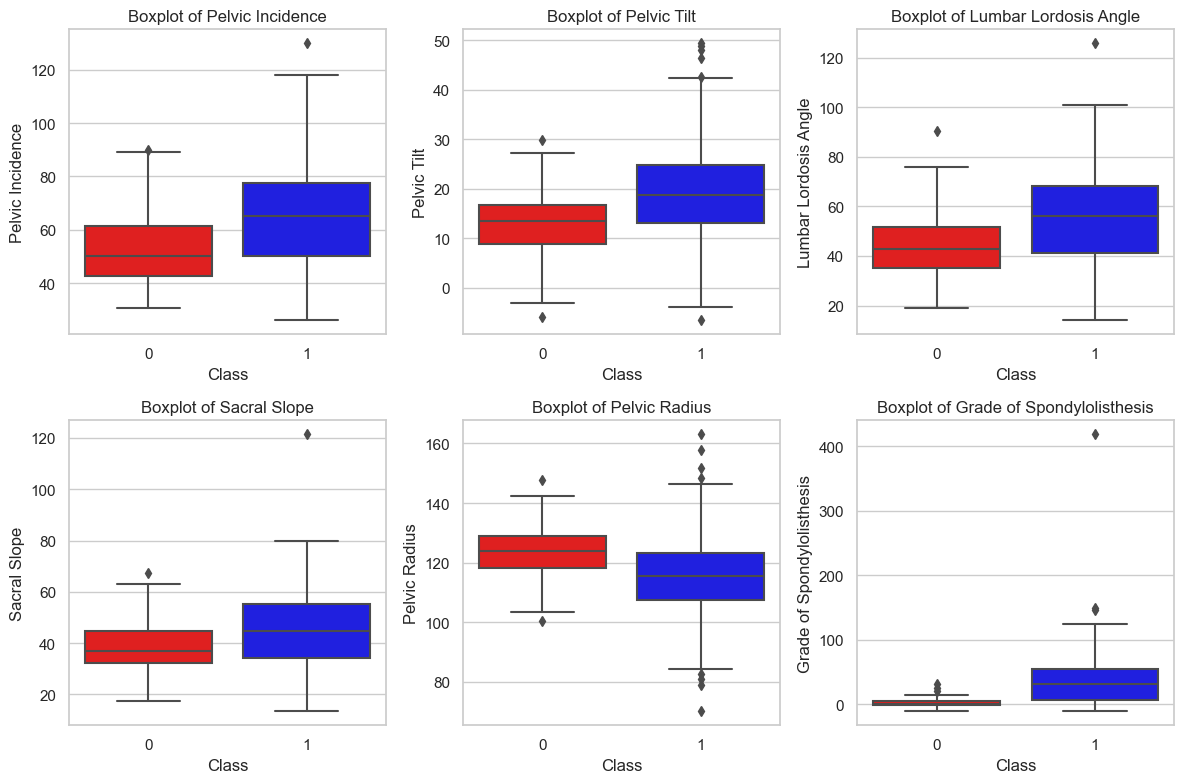

In [5]:
# Create boxplots for each independent variable
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for i, column in enumerate(column_names[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Class', y=column, data=df, palette=class_colors)
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Class')
    plt.ylabel(column)

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

#### iii. Split Data Set

In [6]:
# Filter the DataFrame to select the first 70 rows of Class 0
train_class_0 = df[df['Class'] == 0].iloc[:70]

# Filter the DataFrame to select the first 140 rows of Class 1
train_class_1 = df[df['Class'] == 1].iloc[:140]

# Concatenate the two subsets to create the training set
training_set = pd.concat([train_class_0, train_class_1])

# Create the test set by excluding rows from the training set
test_set = df.drop(training_set.index)

# Verify the shapes of the training and test sets
print("Training Set Shape:", training_set.shape)
print("Test Set Shape:", test_set.shape)

Training Set Shape: (210, 7)
Test Set Shape: (100, 7)


### (c) Classification

#### i. Euclidean Metric

In [7]:
# Extract features and labels from the training and test sets
X_train = training_set.drop('Class', axis=1)
y_train = training_set['Class']
X_test = test_set.drop('Class', axis=1)
y_test = test_set['Class']

# Choose the value of K (e.g., K=5)
k = 5

# Create a KNN classifier with Euclidean distance
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9000


#### ii. Test Data

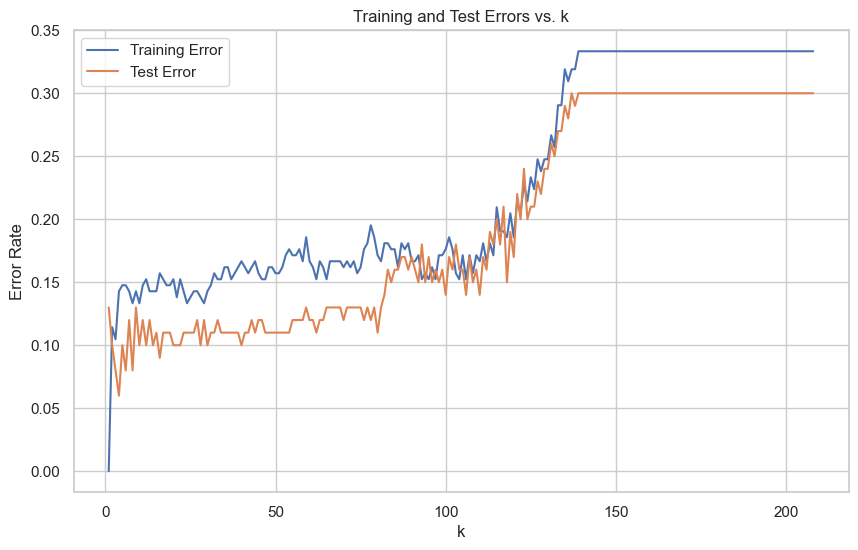

The most suitable k (k*) is 4 with a test error of 0.0600
Confusion Matrix:
[[25  5]
 [ 1 69]]

True Positive Rate (Recall): 0.9857
True Negative Rate: 0.8333
Precision: 0.9324
F1-score: 0.9583


In [8]:
# Define the range of k values
k_values = list(range(208, 0, -1))

# Initialize lists to store errors
train_errors = []
test_errors = []

# Initialize variables to track best test error and corresponding k
best_test_error = float('inf')
best_k = None

for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model to the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calculate training and test errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    # Store errors
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    # Check if this is the best test error so far
    if test_error < best_test_error:
        best_test_error = test_error
        best_k = k

# Plot the training and test errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.title('Training and Test Errors vs. k')
plt.legend()
plt.grid(True)
plt.show()

print(f"The most suitable k (k*) is {best_k} with a test error of {best_test_error:.4f}")

# Now, calculate evaluation metrics for k*
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(confusion)
print()

# True Positive Rate (Recall)
tp_rate = recall_score(y_test, y_pred_best)
print(f"True Positive Rate (Recall): {tp_rate:.4f}")

# True Negative Rate
tn_rate = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
print(f"True Negative Rate: {tn_rate:.4f}")

# Precision
precision = precision_score(y_test, y_pred_best)
print(f"Precision: {precision:.4f}")

# F1-score
f1 = f1_score(y_test, y_pred_best)
print(f"F1-score: {f1:.4f}")

#### iii. Learning Curve

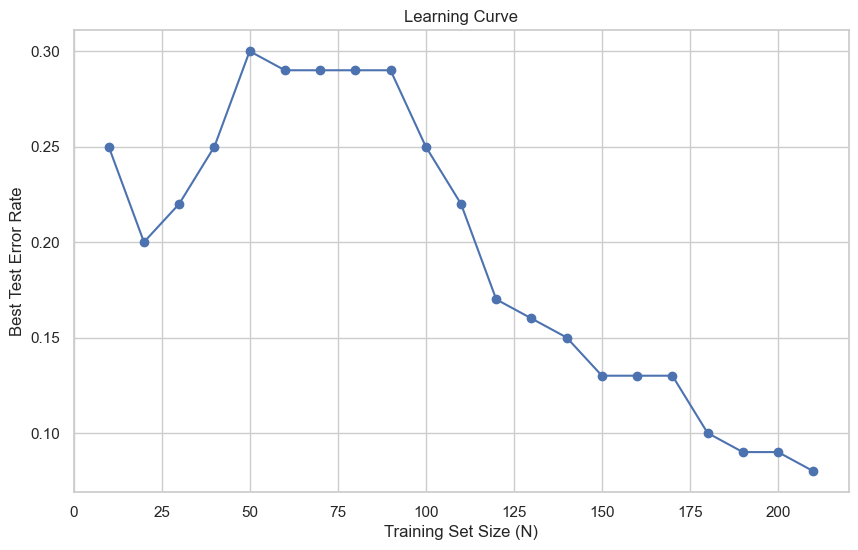

Training Set Size (N=10): Optimal k = 1
Training Set Size (N=20): Optimal k = 6
Training Set Size (N=30): Optimal k = 1
Training Set Size (N=40): Optimal k = 11
Training Set Size (N=50): Optimal k = 26
Training Set Size (N=60): Optimal k = 21
Training Set Size (N=70): Optimal k = 26
Training Set Size (N=80): Optimal k = 31
Training Set Size (N=90): Optimal k = 41
Training Set Size (N=100): Optimal k = 6
Training Set Size (N=110): Optimal k = 6
Training Set Size (N=120): Optimal k = 16
Training Set Size (N=130): Optimal k = 16
Training Set Size (N=140): Optimal k = 16
Training Set Size (N=150): Optimal k = 16
Training Set Size (N=160): Optimal k = 6
Training Set Size (N=170): Optimal k = 6
Training Set Size (N=180): Optimal k = 6
Training Set Size (N=190): Optimal k = 6
Training Set Size (N=200): Optimal k = 6
Training Set Size (N=210): Optimal k = 6


In [9]:
# Define the range of training set sizes and step size for k values
training_set_sizes = list(range(10, 211, 10))
k_step = 5

# Initialize lists to store results
best_test_error_rates = []
optimal_k_values = []

for N in training_set_sizes:
    # Select the subset of the training data based on N
    n_class_0 = N // 3
    n_class_1 = N - n_class_0
    
    train_class_0_subset = train_class_0.iloc[:n_class_0]
    train_class_1_subset = train_class_1.iloc[:n_class_1]
    
    training_subset = pd.concat([train_class_0_subset, train_class_1_subset])
    
    # Initialize variables to track best test error and corresponding k
    best_test_error = float('inf')
    best_k = None
    
    for k in range(1, N, k_step):
        # Create a KNN classifier with the current k value
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Fit the model to the training subset
        knn.fit(training_subset.drop('Class', axis=1), training_subset['Class'])
        
        # Make predictions on the test data
        y_pred = knn.predict(X_test)
        
        # Calculate test error
        test_error = 1 - accuracy_score(y_test, y_pred)
        
        # Check if this is the best test error so far
        if test_error < best_test_error:
            best_test_error = test_error
            best_k = k
    
    # Store the best test error rate and the corresponding k value
    best_test_error_rates.append(best_test_error)
    optimal_k_values.append(best_k)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, best_test_error_rates, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

# Print the optimal k values for each training set size
for N, k in zip(training_set_sizes, optimal_k_values):
    print(f"Training Set Size (N={N}): Optimal k = {k}")


### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [10]:

# Define a range of k values
k_values = list(range(1, 197, 5))

# Initialize lists to store results
results = []

# Initialize variables to track the best parameters
best_k = None
best_test_error = float('inf')

# Iterate over each k value
for k in k_values:
    # Create a KNN classifier with Manhattan distance (p=1) and the current k
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)  # p=1 for Manhattan distance
    
    # Fit the model to the training data
    knn_manhattan.fit(training_set.drop('Class', axis=1), training_set['Class'])
    
    # Make predictions on the test data
    y_pred_manhattan = knn_manhattan.predict(X_test)
    
    # Calculate the test error for Manhattan distance
    test_error_manhattan = 1 - accuracy_score(y_test, y_pred_manhattan)
    
    # Store the test error
    results.append({
        'Distance Metric': 'Manhattan (p=1)',
        'k': k,
        'Test Error': test_error_manhattan
    })

    # Check if this is the best test error so far
    if test_error_manhattan < best_test_error:
        best_test_error = test_error_manhattan
        best_k = k

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame(results)

# Print the summary of results
print("Summary of Test Errors for Manhattan Distance (p=1)")
print(summary_df)

# Print the best k for Manhattan distance (p=1)
print(f"Best k for Manhattan Distance (p=1): {best_k}")


Summary of Test Errors for Manhattan Distance (p=1)
    Distance Metric    k  Test Error
0   Manhattan (p=1)    1        0.12
1   Manhattan (p=1)    6        0.11
2   Manhattan (p=1)   11        0.11
3   Manhattan (p=1)   16        0.12
4   Manhattan (p=1)   21        0.12
5   Manhattan (p=1)   26        0.11
6   Manhattan (p=1)   31        0.12
7   Manhattan (p=1)   36        0.13
8   Manhattan (p=1)   41        0.13
9   Manhattan (p=1)   46        0.13
10  Manhattan (p=1)   51        0.14
11  Manhattan (p=1)   56        0.13
12  Manhattan (p=1)   61        0.15
13  Manhattan (p=1)   66        0.15
14  Manhattan (p=1)   71        0.14
15  Manhattan (p=1)   76        0.14
16  Manhattan (p=1)   81        0.16
17  Manhattan (p=1)   86        0.15
18  Manhattan (p=1)   91        0.20
19  Manhattan (p=1)   96        0.20
20  Manhattan (p=1)  101        0.22
21  Manhattan (p=1)  106        0.21
22  Manhattan (p=1)  111        0.23
23  Manhattan (p=1)  116        0.21
24  Manhattan (p=1)  12

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [11]:
# Define a range of log10(p) values
log_p_values = np.arange(0.1, 1.1, 0.1)

# Initialize lists to store results
results = []

# Initialize variables to track the best parameters
best_log10_p = None
best_test_error = float('inf')

# Use the k* found for Manhattan distance (p=1)
k_star_manhattan = best_k

# Iterate over each log10(p) value
for log10_p in log_p_values:
    # Calculate the corresponding p value
    p = 10 ** log10_p
    
    # Create a KNN classifier with Minkowski distance and the current log10(p) value, using k* for Manhattan distance
    knn_minkowski = KNeighborsClassifier(n_neighbors=k_star_manhattan, p=p)  # Use k* for Manhattan distance
    
    # Fit the model to the training data
    knn_minkowski.fit(training_set.drop('Class', axis=1), training_set['Class'])
    
    # Make predictions on the test data
    y_pred_minkowski = knn_minkowski.predict(X_test)
    
    # Calculate the test error for Minkowski distance
    test_error_minkowski = 1 - accuracy_score(y_test, y_pred_minkowski)
    
    # Store the test error
    results.append({
        'Distance Metric': f'Minkowski (log10(p)={log10_p:.1f})',
        'log10(p)': log10_p,
        'Test Error': test_error_minkowski
    })

    # Check if this is the best test error so far
    if test_error_minkowski < best_test_error:
        best_test_error = test_error_minkowski
        best_log10_p = log10_p

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame(results)

# Print the summary of results
print("Summary of Test Errors for Minkowski Distance with Varying log10(p)")
print(summary_df)

# Print the best log10(p)
print(f"Best log10(p) for Minkowski Distance: {best_log10_p:.1f}")


Summary of Test Errors for Minkowski Distance with Varying log10(p)
            Distance Metric  log10(p)  Test Error
0  Minkowski (log10(p)=0.1)       0.1        0.09
1  Minkowski (log10(p)=0.2)       0.2        0.09
2  Minkowski (log10(p)=0.3)       0.3        0.08
3  Minkowski (log10(p)=0.4)       0.4        0.08
4  Minkowski (log10(p)=0.5)       0.5        0.08
5  Minkowski (log10(p)=0.6)       0.6        0.06
6  Minkowski (log10(p)=0.7)       0.7        0.07
7  Minkowski (log10(p)=0.8)       0.8        0.08
8  Minkowski (log10(p)=0.9)       0.9        0.09
9  Minkowski (log10(p)=1.0)       1.0        0.09
Best log10(p) for Minkowski Distance: 0.6


##### C. Chebyshev Distance With p -> infinity.

In [12]:
# Define a range of k values
k_values = list(range(1, 197, 5))

# Initialize lists to store results
results = []

# Initialize variables to track the best parameters
best_k = None
best_test_error = float('inf')

# Iterate over each k value
for k in k_values:
    # Create a KNN classifier with Chebyshev distance (Minkowski distance with p → ∞) and the current k
    knn_chebyshev = KNeighborsClassifier(n_neighbors=k, p=float('inf'))  # p → ∞ for Chebyshev distance
    
    # Fit the model to the training data
    knn_chebyshev.fit(training_set.drop('Class', axis=1), training_set['Class'])
    
    # Make predictions on the test data
    y_pred_chebyshev = knn_chebyshev.predict(X_test)
    
    # Calculate the test error for Chebyshev distance
    test_error_chebyshev = 1 - accuracy_score(y_test, y_pred_chebyshev)
    
    # Store the test error
    results.append({
        'Distance Metric': 'Chebyshev (p → ∞)',
        'k': k,
        'Test Error': test_error_chebyshev
    })

    # Check if this is the best test error so far
    if test_error_chebyshev < best_test_error:
        best_test_error = test_error_chebyshev
        best_k = k

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame(results)

# Print the summary of results
print("Summary of Test Errors for Chebyshev Distance (Minkowski with p → ∞)")
print(summary_df)

# Print the best k for Chebyshev distance
print(f"Best k for Chebyshev Distance (p → ∞): {best_k}")


Summary of Test Errors for Chebyshev Distance (Minkowski with p → ∞)
      Distance Metric    k  Test Error
0   Chebyshev (p → ∞)    1        0.13
1   Chebyshev (p → ∞)    6        0.10
2   Chebyshev (p → ∞)   11        0.12
3   Chebyshev (p → ∞)   16        0.08
4   Chebyshev (p → ∞)   21        0.11
5   Chebyshev (p → ∞)   26        0.12
6   Chebyshev (p → ∞)   31        0.12
7   Chebyshev (p → ∞)   36        0.10
8   Chebyshev (p → ∞)   41        0.13
9   Chebyshev (p → ∞)   46        0.12
10  Chebyshev (p → ∞)   51        0.12
11  Chebyshev (p → ∞)   56        0.12
12  Chebyshev (p → ∞)   61        0.14
13  Chebyshev (p → ∞)   66        0.13
14  Chebyshev (p → ∞)   71        0.14
15  Chebyshev (p → ∞)   76        0.11
16  Chebyshev (p → ∞)   81        0.14
17  Chebyshev (p → ∞)   86        0.12
18  Chebyshev (p → ∞)   91        0.15
19  Chebyshev (p → ∞)   96        0.14
20  Chebyshev (p → ∞)  101        0.19
21  Chebyshev (p → ∞)  106        0.18
22  Chebyshev (p → ∞)  111        

#### ii. Mahalanobis Distance.

In [13]:
# Define a range of k values
k_values = list(range(1, 197, 5))

# Initialize lists to store results
results = []

# Initialize variables to track the best parameters
best_k = None
best_test_error = float('inf')

# Compute the inverse covariance matrix for the training data
inverse_covariance_matrix = np.linalg.pinv(training_set.drop('Class', axis=1).cov())

# Iterate over each k value
for k in k_values:
    # Create a KNN classifier with Mahalanobis distance and the current k
    knn_mahalanobis = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inverse_covariance_matrix})
    
    # Fit the model to the training data
    knn_mahalanobis.fit(training_set.drop('Class', axis=1), training_set['Class'])
    
    # Make predictions on the test data
    y_pred_mahalanobis = knn_mahalanobis.predict(X_test)
    
    # Calculate the test error for Mahalanobis distance
    test_error_mahalanobis = 1 - accuracy_score(y_test, y_pred_mahalanobis)
    
    # Store the test error
    results.append({
        'Distance Metric': 'Mahalanobis',
        'k': k,
        'Test Error': test_error_mahalanobis
    })

    # Check if this is the best test error so far
    if test_error_mahalanobis < best_test_error:
        best_test_error = test_error_mahalanobis
        best_k = k

    # Check if k=1 is optimal
    if best_k == 1:
        next_best_k = 6  # Choose the next k, e.g., k=6
    else:
        next_best_k = best_k

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame(results)

# Print the summary of results
print("Summary of Test Errors for Mahalanobis Distance")
print(summary_df)

# Print the best k for Mahalanobis distance
print(f"Best k for Mahalanobis Distance: {next_best_k}")


Summary of Test Errors for Mahalanobis Distance
   Distance Metric    k  Test Error
0      Mahalanobis    1        0.17
1      Mahalanobis    6        0.17
2      Mahalanobis   11        0.20
3      Mahalanobis   16        0.20
4      Mahalanobis   21        0.21
5      Mahalanobis   26        0.20
6      Mahalanobis   31        0.23
7      Mahalanobis   36        0.21
8      Mahalanobis   41        0.24
9      Mahalanobis   46        0.24
10     Mahalanobis   51        0.24
11     Mahalanobis   56        0.26
12     Mahalanobis   61        0.25
13     Mahalanobis   66        0.27
14     Mahalanobis   71        0.26
15     Mahalanobis   76        0.25
16     Mahalanobis   81        0.24
17     Mahalanobis   86        0.26
18     Mahalanobis   91        0.26
19     Mahalanobis   96        0.26
20     Mahalanobis  101        0.28
21     Mahalanobis  106        0.28
22     Mahalanobis  111        0.31
23     Mahalanobis  116        0.29
24     Mahalanobis  121        0.30
25     Mahalanob

### (e) Weighted Decision

In [14]:
# Define a range of k values
k_values = list(range(1, 197, 5))

# Initialize lists to store results
results = []

# Iterate over each k value
for k in k_values:
    for metric_name, metric_value in [('Euclidean', 'euclidean'), ('Manhattan', 'manhattan'), ('Chebyshev', 'chebyshev')]:
        # Create a KNN classifier with the specified distance metric, the current k, and weights='distance'
        knn_weighted = KNeighborsClassifier(n_neighbors=k, metric=metric_value, weights='distance')
        
        # Fit the model to the training data
        knn_weighted.fit(training_set.drop('Class', axis=1), training_set['Class'])
        
        # Make predictions on the test data
        y_pred_weighted = knn_weighted.predict(X_test)
        
        # Calculate the test error for weighted decision
        test_error_weighted = 1 - accuracy_score(y_test, y_pred_weighted)
        
        # Store the test error
        results.append({
            'Distance Metric': metric_name,
            'k': k,
            'Test Error': test_error_weighted
        })

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame(results)

# Find the minimum test error and corresponding k for each distance metric
min_test_errors = summary_df.groupby('Distance Metric')['Test Error'].min()
best_ks = summary_df.loc[summary_df.groupby('Distance Metric')['Test Error'].idxmin()]['k']

# Print the summary of results for each distance metric
print("Summary of Test Errors for Weighted Decision with Different Distance Metrics")
print(summary_df)

# Print the best k and corresponding test error for each distance metric
for metric_name, best_k, min_error in zip(min_test_errors.index, best_ks, min_test_errors):
    print(f"Best k for {metric_name} Distance: {best_k}, Minimum Test Error: {min_error:.4f}")


Summary of Test Errors for Weighted Decision with Different Distance Metrics
    Distance Metric    k  Test Error
0         Euclidean    1        0.13
1         Manhattan    1        0.12
2         Chebyshev    1        0.13
3         Euclidean    6        0.10
4         Manhattan    6        0.11
..              ...  ...         ...
115       Manhattan  191        0.28
116       Chebyshev  191        0.27
117       Euclidean  196        0.28
118       Manhattan  196        0.29
119       Chebyshev  196        0.28

[120 rows x 3 columns]
Best k for Chebyshev Distance: 16, Minimum Test Error: 0.1100
Best k for Euclidean Distance: 6, Minimum Test Error: 0.1000
Best k for Manhattan Distance: 26, Minimum Test Error: 0.1000


### (f) Training Error Rate

Lowest Training Error Rate Achieved: 0.0000